In [1]:
from logicqubit.logic import *
from cmath import *
import numpy as np
import sympy as sp
import scipy
from scipy.optimize import *
from scipy.linalg import expm, sinm, cosm, logm, sqrtm
import matplotlib.pyplot as plt

Cuda is not available!
logicqubit version 1.5.8


In [2]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr): # transformada quântica de Fourier inversa
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)

In [3]:
gates = Gates(1)

ID = gates.ID()
X = gates.X()
Y = gates.Y()
Z = gates.Z()

In [4]:
offset = 3
H = ID*offset + X*2.5 + Z

min(scipy.linalg.eig(H.get())[0])-offset

(-2.6925824035672523+0j)

In [5]:
U = np.matrix(expm(1j*H.get())).tolist()
print(U)

[[(0.8691115288453582-0.2867295478451589j), (-0.05687527049591868-0.3989943864600239j)], [(-0.056875270495918714-0.39899438646002394j), (0.9146117452420932+0.03246596132286025j)]]


In [6]:
logicQuBit  = LogicQuBit(5)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()
x4 = Qubit()

y = Qubit()

x1.H()
x2.H()
x3.H()
x4.H()

y.X()
y.H()

y.CU(x4, U)

y.CU(x3, U)
y.CU(x3, U)

y.CU(x2, U)
y.CU(x2, U)
y.CU(x2, U)
y.CU(x2, U)

y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)

iqft([x1,x2,x3,x4])

/home/cleoner/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


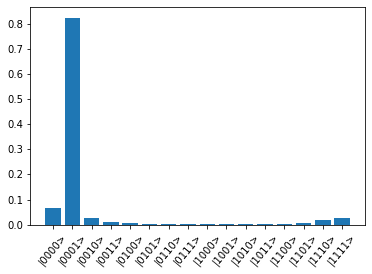

[(0.0655340271061046+0j), (0.8247397483547905+0j), (0.027070108922934103+0j), (0.0086537475211244+0j), (0.004474001846124535+0j), (0.002912408239613308+0j), (0.002192423331308351+0j), (0.0018381811808413314+0j), (0.001686064308104186+0j), (0.0016799740976153107+0j), (0.0018204621937410112+0j), (0.0021691717079675363+0j), (0.0029296621469588314+0j), (0.004939968360456229+0j), (0.020316478314695706+0j), (0.02704357236761661+0j)]


In [7]:
res = logicQuBit.Measure([x1,x2,x3,x4])
logicQuBit.Plot()
print(res)

In [8]:
def Text2List(table):
    list = [int(i, base=2) for i in table]
    size = len(table[0])
    tmp = sorted(list, key=int, reverse=False)  # values in ascending order
    result = [[int(bin(j)[2:].zfill(size)[i]) for i in range(size)] for j in tmp]
    return result

def BinList(n):
    blist = []
    for i in iter(range(2 ** n)):
        b = bin(i)[2:].zfill(n)  # value in binary, ex: i=1, n=4 -> '0001'
        blist.append(b)
    return Text2List(blist)

size=4
blist = [value for i,value in enumerate(BinList(size)) if res[i]>0.3] 
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)])-offset for j in blist]
print(results)

[-2.607300918301276]
